In [1]:
import pandas as pd 

In [2]:
dataset = pd.read_csv('spam.csv')
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy... Available only...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
new_dataset = pd.DataFrame(dataset)
df = pd.DataFrame(new_dataset)

In [4]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# droping the last three columns as less or no data is there in those columns
new_dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,)

In [6]:
new_dataset

,v1,v2
0,ham,"Go until jurong point, crazy... Available only..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# replacing the value of ham and spam for our benefit in further steps
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_dataset['v1'] = encoder.fit_transform(new_dataset['v1'])

In [8]:
new_dataset

,v1,v2
0,0,"Go until jurong point, crazy... Available only..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
# checking for null value
new_dataset.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
# checking and removing duplicate from the dataset
print('Duplicates in dataset: ',new_dataset.duplicated().sum())
new_dataset = new_dataset.drop_duplicates(keep='first')

Duplicates in dataset:  403


In [11]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int32 
 1   v2      5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


In [12]:
# checking the percentage of ham vs spam in the dataset
new_dataset['v1'].value_counts()

v1
0    4516
1     653
Name: count, dtype: int64

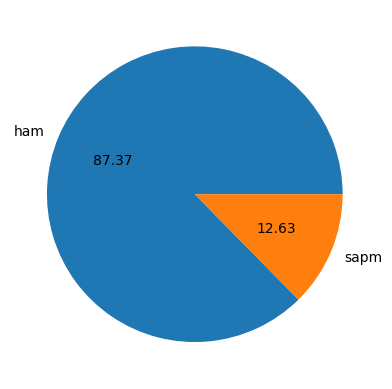

In [13]:
# representing the ham and spam on pie chart
import matplotlib.pyplot as plt

plt.pie(new_dataset['v1'].value_counts(),labels=['ham','sapm'],autopct="%0.2f")
plt.show()

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
# calculating the number of caharacters, words in a sentence in sms
import nltk
new_dataset['#characters'] = new_dataset['v2'].apply(len)
new_dataset['#words'] = new_dataset['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
new_dataset['#sentences'] = new_dataset['v2'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\debas\AppData\Local\Temp\ipykernel_17284\3942846748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['#characters'] = new_dataset['v2'].apply(len)
C:\Users\debas\AppData\Local\Temp\ipykernel_17284\3942846748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['#words'] = new_dataset['v2'].apply(lambda x:len(nltk.word_tokenize(x)))
C:\Users\debas\AppData\Local\Temp\ipykernel_17284\3942846748.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

In [16]:
new_dataset.head()

,v1,v2,#characters,#words,#sentences
0,0,"Go until jurong point, crazy... Available only...",112,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
# seeing the number of characters, sentences and words used 
new_dataset[['#characters','#words','#sentences']].describe() 

,#characters,#words,#sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924744,18.456955,1.966531
std,58.175085,13.325444,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


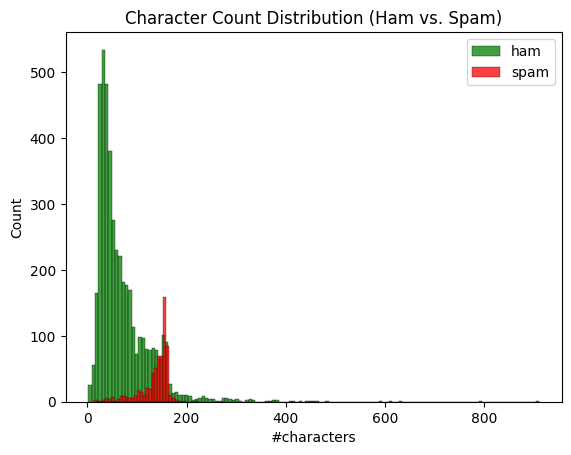

In [18]:
# ploting histogram to see the #characters for ham and spam for better comparison
import seaborn as sns

sns.histplot(new_dataset[new_dataset['v1'] == 0]['#characters'],color='green')
sns.histplot(new_dataset[new_dataset['v1'] == 1]['#characters'],color='red')
plt.title('Character Count Distribution (Ham vs. Spam)')
plt.legend(['ham','spam'])

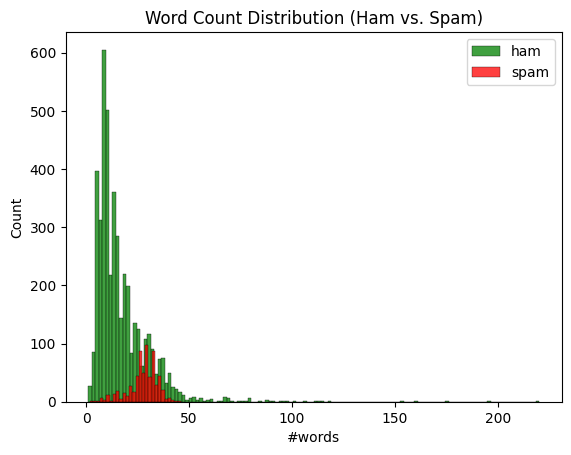

In [19]:
# ploting histogram to see the #words for ham and spam for better comparison
import seaborn as sns

sns.histplot(new_dataset[new_dataset['v1'] == 0]['#words'],color='green')
sns.histplot(new_dataset[new_dataset['v1'] == 1]['#words'],color='red')
plt.title('Word Count Distribution (Ham vs. Spam)')
plt.legend(['ham','spam'])

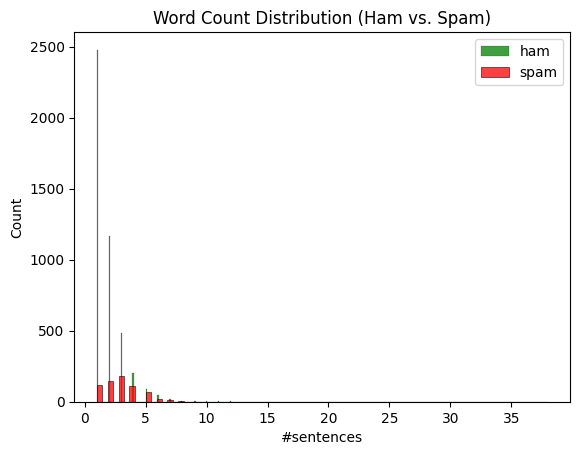

In [20]:
# ploting histogram to see the #Sentences for ham and spam for better comparison
import seaborn as sns

sns.histplot(new_dataset[new_dataset['v1'] == 0]['#sentences'],color='green')
sns.histplot(new_dataset[new_dataset['v1'] == 1]['#sentences'],color='red')
plt.title('Word Count Distribution (Ham vs. Spam)')
plt.legend(['ham','spam'])

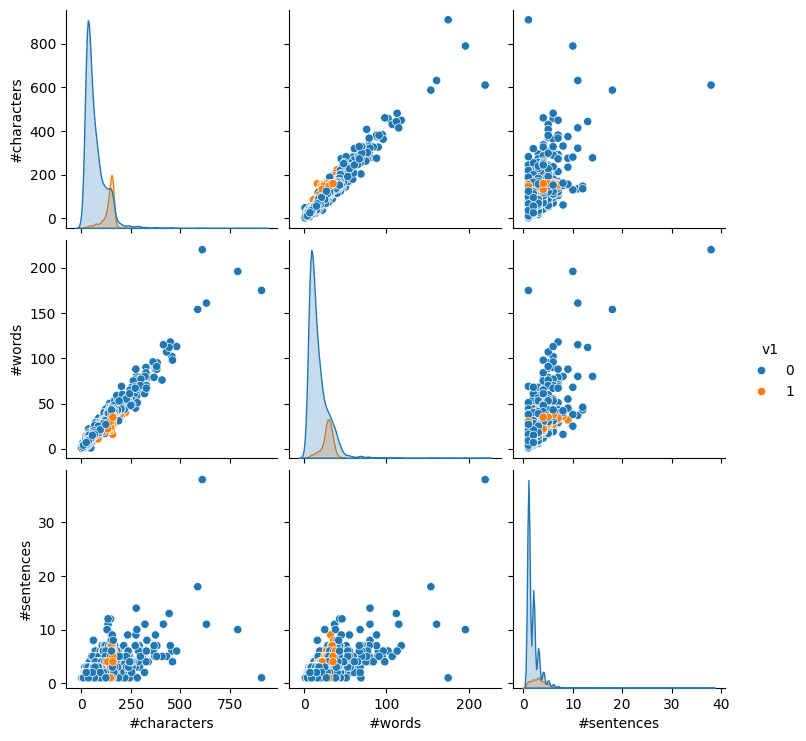

In [21]:
sns.pairplot(new_dataset,hue='v1')
plt.show()

In [22]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def text_transformer(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    x =  []
    for i in text:
        if i.isalnum():
            x.append(i)
    text = x[:]
    x.clear()
    for i in text:
        if i not in stopwords.words('english'):
            if i not in string.punctuation:
                x.append(i)

    text = x[:]
    x.clear()
    for i in text:
        x.append(ps.stem(i))

    return " ".join(x)

In [23]:
new_dataset['transformed_text'] = new_dataset['v2'].apply(text_transformer)

C:\Users\debas\AppData\Local\Temp\ipykernel_17284\14822569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_dataset['transformed_text'] = new_dataset['v2'].apply(text_transformer)


In [24]:
new_dataset.head()

,v1,v2,#characters,#words,#sentences,transformed_text
0,0,"Go until jurong point, crazy... Available only...",112,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [25]:
spam_dict = []

for i in new_dataset[new_dataset['v1'] == 1]['transformed_text'].tolist():
    for word in i.split():
        spam_dict.append(word)

In [26]:
# collecting the most used words in the spam messages
from collections import Counter

spam_df = pd.DataFrame(Counter(spam_dict).most_common(30))
spam_df

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


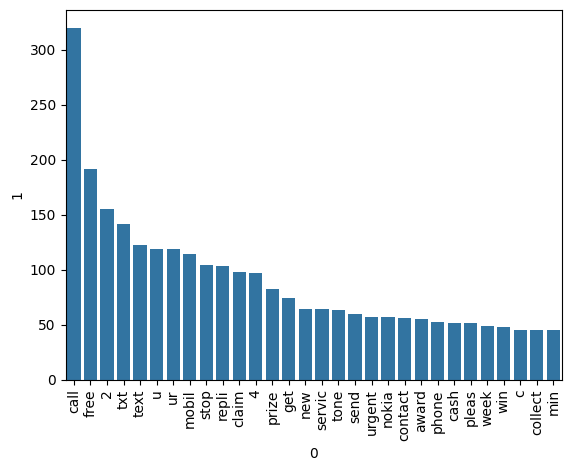

In [27]:
# plotting a bar graph 
sns.barplot(x = spam_df[0],y = spam_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [28]:
# collecting the most used words in ham(not spam) messages
ham_dict = []

for i in new_dataset[new_dataset['v1'] == 0]['transformed_text'].tolist():
    for word in i.split():
        ham_dict.append(word)

from collections import Counter

ham_df = pd.DataFrame(Counter(ham_dict).most_common(30))
ham_df

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


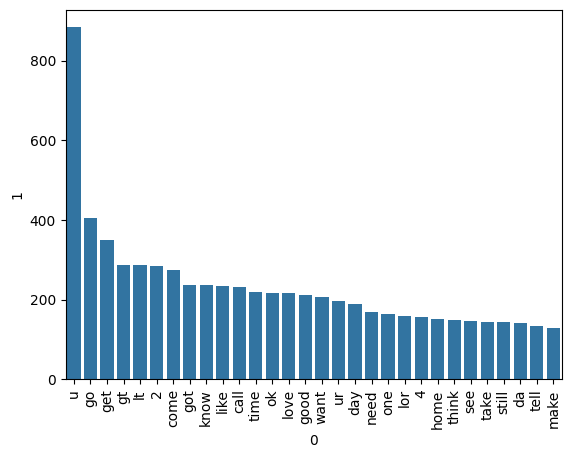

In [29]:
sns.barplot(x = ham_df[0],y = ham_df[1])
plt.xticks(rotation='vertical')
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [31]:
X = tfidf.fit_transform(new_dataset['transformed_text']).toarray()

In [32]:
X.shape

(5169, 3000)

In [33]:
y = new_dataset['v1'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [36]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression

In [37]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
lrc = LogisticRegression(solver='liblinear',penalty='l1')

In [38]:
# applying GaussianNB to the dataset
gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [39]:
# applying MultinomialNB to the dataset
mnb.fit(X_train,y_train)
y_pred_mnb = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [40]:
# applying MultinomialNB to the dataset
bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [41]:
# applying Linear Regression to the dataset
lrc.fit(X_train,y_train)
y_pred_lrc = lrc.predict(X_test)
print(accuracy_score(y_test,y_pred_lrc))
print(confusion_matrix(y_test,y_pred_lrc))
print(precision_score(y_test,y_pred_lrc))

0.9564796905222437
[[893   3]
 [ 42  96]]
0.9696969696969697


we are taking Multinomial Naive Baeyes because the data is imbalanced so we would require more precision score than accuracy<br>
logistic regression is giving less precision and accuracy score for the given dataset<br>
so choosing naive baeyes is the ideal option

In [42]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))